Question 1

In [1]:
import numpy as np
from scipy.io.matlab import loadmat
from scipy.optimize import linear_sum_assignment

In [2]:
salinas = loadmat('data/Salinas_corrected.mat')['salinas_corrected']
salinas.shape

(512, 217, 204)

In [3]:
salinas_gt = loadmat('data/Salinas_gt.mat')['salinas_gt']
salinas_gt.shape

(512, 217)

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X = salinas.reshape((512*217,204))
y = salinas_gt.reshape(512*217)

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.80)

In [6]:
np.unique(y)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16],
      dtype=uint8)

In [7]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans, DBSCAN
from scipy.stats import chisquare

In [8]:
model = KNeighborsClassifier(n_neighbors=7)
model.fit(X_train,y_train)
predicted = model.predict(X_test)
cm = confusion_matrix(y_test,predicted)

In [9]:
model.score(X_test,y_test)

0.9077449259709284

In [10]:
chisquare(cm,axis=None)

Power_divergenceResult(statistic=1517713.2955312545, pvalue=0.0)

In [11]:
k = len(np.unique(y))
model = KMeans(n_clusters=k)
predicted = model.fit_predict(X)
cm = confusion_matrix(y,predicted)
chisquare(cm,axis=None)

Power_divergenceResult(statistic=1608326.8301591298, pvalue=0.0)

In [12]:
model = DBSCAN()
model.fit(X)
predicted = model.fit_predict(X)
chisquare(confusion_matrix(y,predicted),axis=None)

Power_divergenceResult(statistic=10222045.201756908, pvalue=0.0)

Question 2

In [13]:
from sklearn.svm import LinearSVC,SVC
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [14]:
model1 = SVC(C=1.1,
             degree=2,
             kernel='poly',
             max_iter=12500,
             tol=1e-4)
model1.fit(X_train,y_train)

predicted = model1.predict(X_test)

print(accuracy_score(predicted,y_test))
confusion_matrix(predicted,y_test)

c:\users\eysan.sans\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=12500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


0.7603168174249584


array([[10504,     1,     2,   380,   278,   525,    25,     6,    33,
         1221,   165,   193,   381,   196,    30,    14,    33],
       [   82,   400,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0],
       [  105,    12,   756,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0],
       [  112,     0,     0,     0,     0,     0,   817,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0],
       [   94,     0,     0,     0,     0,     0

In [15]:
rows, cols = linear_sum_assignment(cm,maximize=True)
cm = cm[rows,:]
cm = cm[:,cols]
cm

array([[12185,   697,  2792,   902,  4112,  9546,   604,   652,   789,
        13100,  2732,  5361,    66,  1588,   884,   666,   299],
       [    0,  2004,     5,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0],
       [    0,  2136,  1475,     0,     0,     0,     0,    96,     2,
            0,     0,     0,     0,     0,    12,     0,     5],
       [ 1419,     0,     0,     0,     2,   317,     0,     0,     0,
          238,     0,     0,     0,     0,     0,     0,     0],
       [    0,     0,     0,     0,  1384,    10,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0],
       [   95,     0,     0,     1,    31,  2546,     0,     0,     0,
            0,     0,     5,     0,     0,     0,     0,     0],
       [    1,     0,     0,     0,     0,     0,  3747,     0,     0,
            3,    91,    95,     0,     2,    20,     0,     0],
       [    1,     0,     6,     0,     0,     1

Question 3

In [16]:
import pandas as pd
import math
from sklearn.decomposition import PCA
from sklearn.svm import SVC

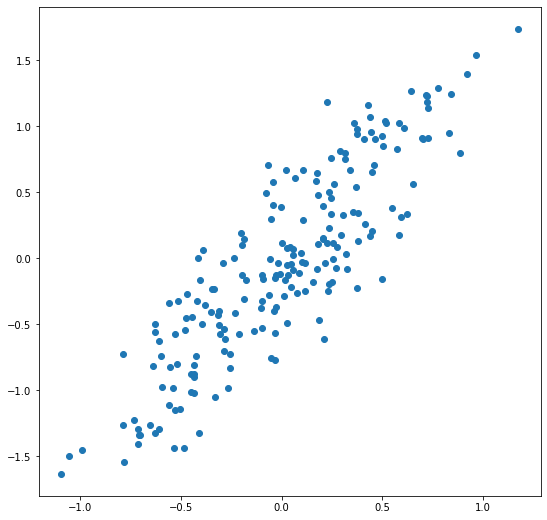

In [17]:
def randEllipse(ps,theta0,center,N):
    a,b = ps
    x0,y0 = center
    rot = np.array([[math.cos(theta0),math.sin(theta0)],[-math.sin(theta0),math.cos(theta0)]])
    result = []
    for i in range(N):
        r0 = np.random.normal(loc=1.0,scale=0.5)
        theta = np.random.uniform(0, 2*math.pi)
        point = np.matmul(np.array([x0+a*r0*math.cos(theta),y0+b*r0*math.sin(theta)]),rot)
        result.append(point)
    return result

cloud = np.array(randEllipse((0.25,1),-math.pi/6,(0,0),200))
data = pd.DataFrame({"x": cloud[:,0], "y": cloud[:,1]})

plt.scatter(data["x"],data["y"])

[1.87566574 0.12433426]


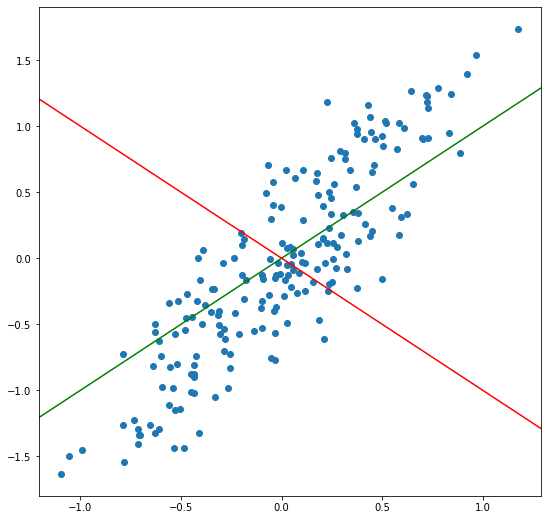

In [18]:
eigvals, eigvectors = np.linalg.eig(data.corr())
print(eigvals)

def perp(xs):
    return [xs[1],-xs[0]]

plt.scatter(data["x"],data["y"])
plt.axline([0,0],perp(eigvectors[0]),c='green')
plt.axline([0,0],eigvectors[0],c='red')

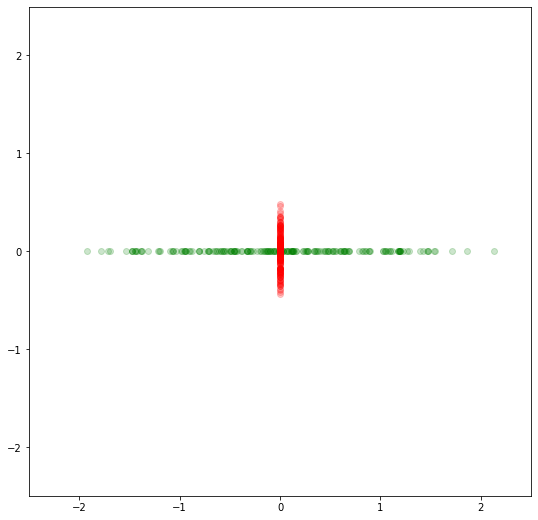

In [19]:
model = PCA()

projected = model.fit_transform(data)

plt.xlim((-2.5,2.5))
plt.ylim((-2.5,2.5))
plt.scatter(projected[:,0],np.zeros(len(projected)),c='green',alpha=0.2)
plt.scatter(np.zeros(len(projected)),projected[:,1],c='red',alpha=0.2)

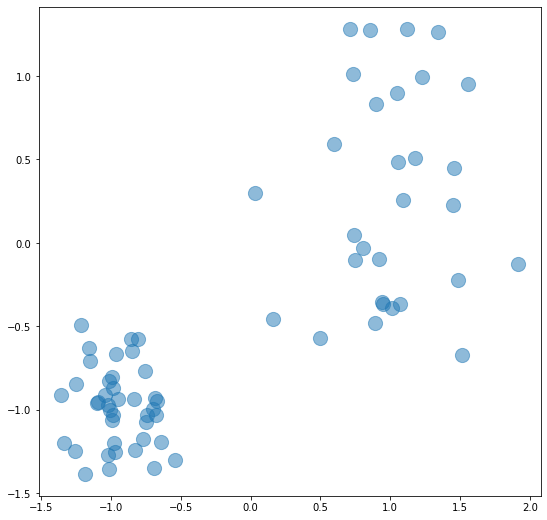

In [21]:
def randDisk(center,r,N):
    result = []
    x0,y0=center
    for i in range(N):
        r0 = np.random.normal(loc=r,scale=r/2)
        theta = np.random.uniform(0, 2*math.pi)
        result.append([x0+r0*math.cos(theta),y0+r0*math.sin(theta)])
    return result

tmp = randDisk([1,1],0.3,10)
tmp.extend(randDisk([-1,-1],0.3,40))
tmp.extend(randDisk([1,0],0.5,20))
cloud = np.array(tmp)
v = [1,1]
colors = [1 if np.dot(x,v)>0 else -1 for x in cloud]
data = pd.DataFrame({"x": cloud[:,0], "y": cloud[:,1], "class": colors})

plt.scatter(data['x'],data['y'],s=200,alpha=0.5,cmap='jet')

In [22]:
def findBeta(v,xs,side):
    d = np.array([v[1],-v[0]])
    tmp = [np.dot(x,v) for x in xs]
    if side == -1:
        i = np.argmin(tmp)
    else:
        i = np.argmax(tmp)
    return [xs[i],xs[i]+d]

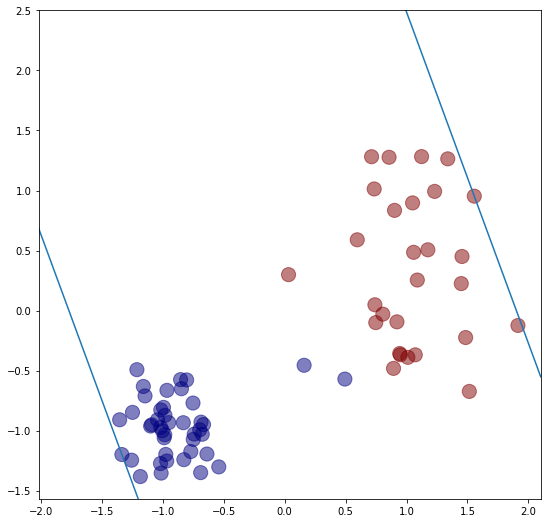

In [23]:
v = randDisk([0,0],1,1)[0]

xs = np.array(data[["x","y"]][data["class"]==1])
ys = np.array(data[["x","y"]][data["class"]==-1])

a,b = findBeta(v,xs,-1)
c,d = findBeta(v,ys,1)

plt.scatter(cloud[:,0],cloud[:,1],c=colors,cmap='jet',s=200,alpha=0.5)
plt.axline(a,b)
plt.axline(c,d)

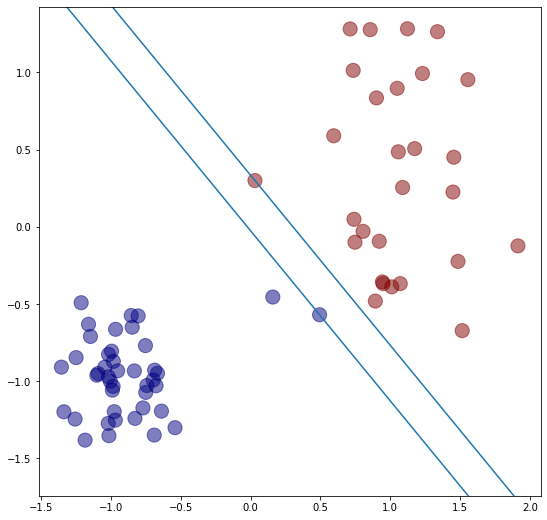

In [24]:
model = SVC(kernel="linear")

model.fit(data[["x","y"]],data["class"])

v = model.coef_[0]
a,b = findBeta(v,xs,-1)
c,d = findBeta(v,ys,1)
plt.scatter(data["x"],data["y"],c=data["class"],cmap='jet',s=200,alpha=0.5)
plt.axline(a,b)
plt.axline(c,d)